In [1]:
import gym
import numpy as np
from offsim4rl.envs import gridworld
from offsim4rl.agents import spinup
import torch

No protocol specified


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# true env for online learning and online validation
env = gym.make('MyGridNaviCoords-v1', seed=100000)
env.reset_task(np.array([4, 4]))

array([4, 4])

In [4]:
seed = 0
spinup.ppo(
    env_fn=lambda: env, steps_per_epoch=1000, epochs=10, seed=seed, 
    logger_kwargs=dict(output_dir=f'./outputs/grid_/seed={seed}', exp_name='MyGridNaviCoords-v1_ppo_'), 
    ac_kwargs=dict(hidden_sizes=[32, 32], activation=torch.nn.ReLU), 
    validate=True, val_kwargs=dict(val_env_fn=lambda: env, val_n_episodes=10))

Logging data to ./outputs/grid_/seed=0/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "actor_critic":	"MLPActorCritic",
    "clip_ratio":	0.2,
    "env_fn":	"<function <lambda> at 0x7f44400adcb0>",
    "epochs":	10,
    "exp_name":	"MyGridNaviCoords-v1_ppo_",
    "gamma":	0.99,
    "lam":	0.97,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7f43ca4ba410>":	{
            "epoch_dict":	{},
            "exp_name":	"MyGridNaviCoords-v1_ppo_",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"./outputs/grid_/seed=0",
            "output_file":	{
                "<_io.TextIOWrapper name='./outputs/grid_/seed=0/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "mode":	"w"
                }
            }
        }
    },
    "logger_kwargs":	{
        "exp_name":	"MyGridNaviCo

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(f'./outputs/grid_/seed={seed}/progress.txt', sep='\t')

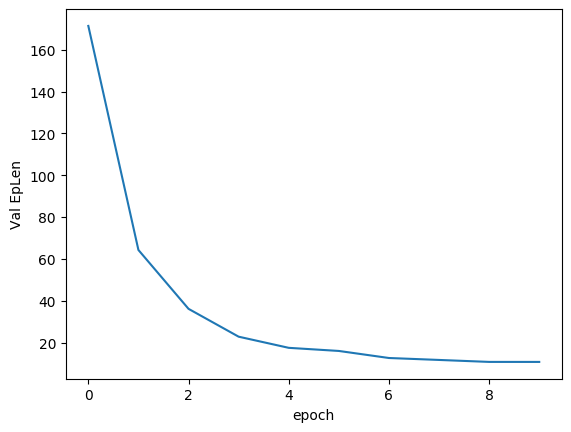

In [7]:
plt.plot(df['EpLen'])
plt.xlabel('epoch')
plt.ylabel('Val EpLen')
plt.show()

In [8]:
from spinup.utils.test_policy import load_policy_and_env, run_policy
_, get_action = load_policy_and_env(f'./outputs/grid_/seed=0')



Loading from ./outputs/grid_/seed=0/pyt_save/model.pt.




In [13]:
run_policy(env, lambda x: int(get_action(x)), render=False, num_episodes=10)

Logging data to /tmp/experiments/1660857911/progress.txt
Episode 0 	 EpRet 0.200 	 EpLen 9
Episode 1 	 EpRet 0.200 	 EpLen 9
Episode 2 	 EpRet 0.100 	 EpLen 10
Episode 3 	 EpRet 0.200 	 EpLen 9
Episode 4 	 EpRet 0.100 	 EpLen 10
Episode 5 	 EpRet 0.100 	 EpLen 10
Episode 6 	 EpRet 0.100 	 EpLen 10
Episode 7 	 EpRet 0.300 	 EpLen 8
Episode 8 	 EpRet -0.300 	 EpLen 14
Episode 9 	 EpRet 0.200 	 EpLen 9
-------------------------------------
|    AverageEpRet |            0.12 |
|        StdEpRet |           0.154 |
|        MaxEpRet |             0.3 |
|        MinEpRet |            -0.3 |
|           EpLen |             9.8 |
-------------------------------------
